<a href="https://colab.research.google.com/github/RisheeM/Movie-Recommendation-System-/blob/main/Movie%20Recommendation%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Recommendation System**

**Objective**:

The objective of this project is to create a recommendation system that suggests movies to users based on movie ratings and other factors using machine learning techniques.

**Data Source:**

You can use the MovieLens dataset, which contains millions of movie ratings from real users. You can download it from MovieLens.

**1. Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

**2. Import Data:**

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**3. Describe Data:**

In [13]:
movies = pd.read_csv('/content/drive/My Drive/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/My Drive/ml-latest-small/ratings.csv')


In [15]:
print("Movies dataset shape:", movies.shape)
print("Ratings dataset shape:", ratings.shape)

print("Movies dataset:")
print(movies.head())

print("Ratings dataset:")
print(ratings.head())


Movies dataset shape: (9742, 3)
Ratings dataset shape: (100836, 4)
Movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


**4. Data Visualization:**

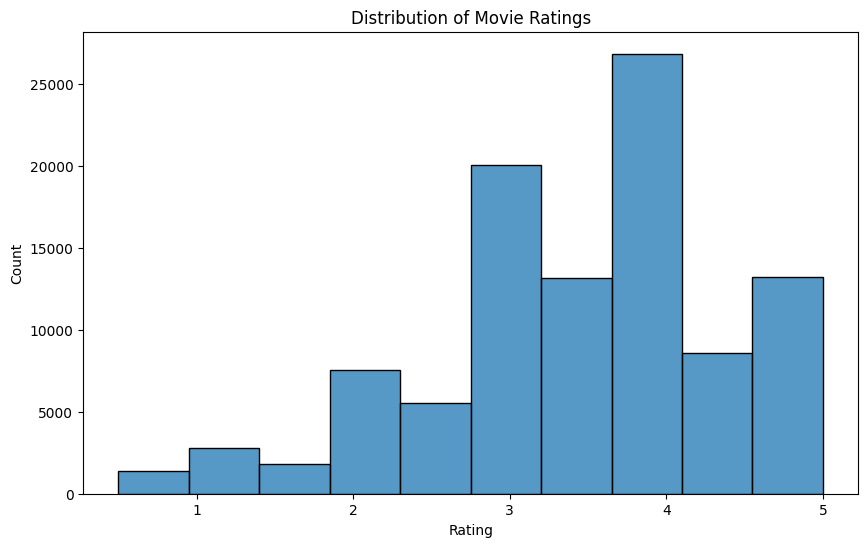

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


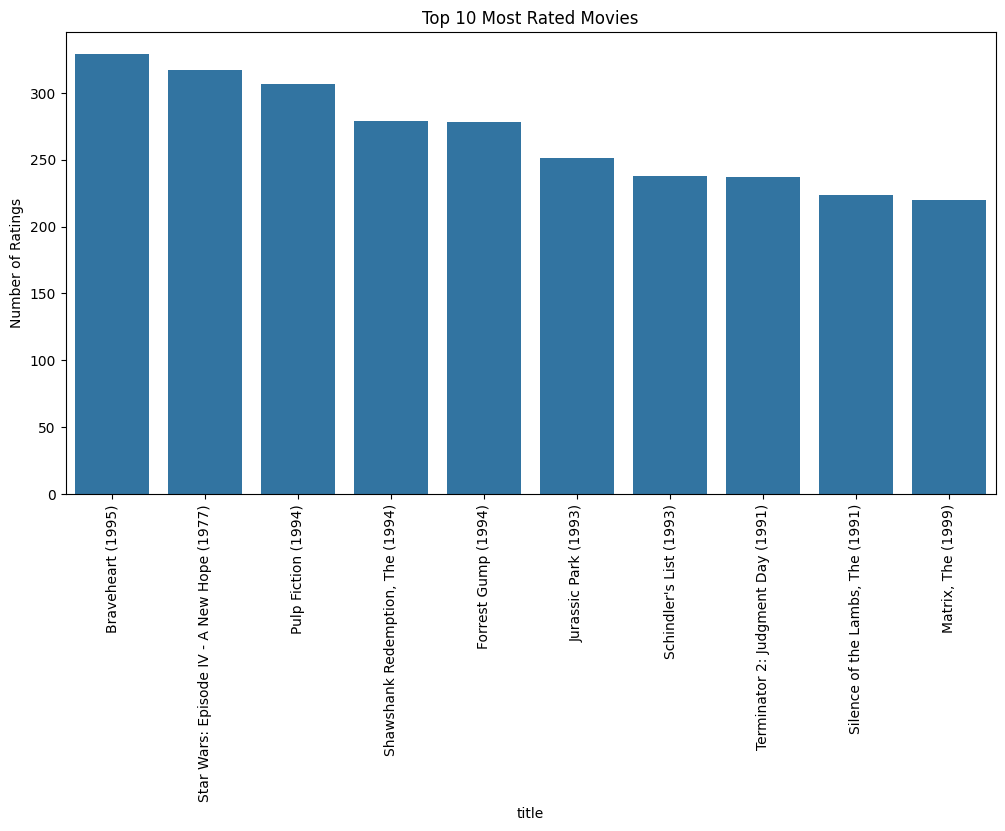

In [17]:
popular_movies = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

popular_movie_titles = movies[movies['movieId'].isin(popular_movies.index)]

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_movie_titles['title'], y=popular_movies.values)
plt.title('Top 10 Most Rated Movies')
plt.xticks(rotation=90)
plt.ylabel('Number of Ratings')
plt.show()


**5. Data Preprocessing:**


In [18]:
movie_ratings = pd.merge(ratings, movies, on='movieId')

print(movie_ratings.isnull().sum())


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


**6. Define Target Variable (y) and Feature Variables (X)**

In [19]:
user_movie_matrix = movie_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)

print(user_movie_matrix.shape)
user_movie_matrix.head()


(610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**7. Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

X = user_movie_matrix.values
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (488, 9719)
Test set size: (122, 9719)


**8. Modeling**

In [21]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(X_train)

test_user_idx = 0

distances, indices = model_knn.kneighbors([X_test[test_user_idx]], n_neighbors=5)

print(f"Nearest neighbors for test user {test_user_idx}: {indices.flatten()}")


Nearest neighbors for test user 0: [ 99 422 372  89  12]


**9. Model Evaluation**

In [22]:
from sklearn.metrics import mean_squared_error

predicted_ratings = X_train[indices.flatten()]
actual_ratings = X_test[test_user_idx]

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings.mean(axis=0)))
print(f"RMSE: {rmse}")


RMSE: 0.5412418032424298


**10. Prediction**

In [25]:
user_index = 30


distances, indices = model_knn.kneighbors([X_train[user_index]], n_neighbors=5)

recommended_movies_indices = indices.flatten()
recommended_movies = user_movie_matrix.columns[recommended_movies_indices]

print("Recommended movies for user 29:")
for movie in recommended_movies:
    print(movie)


Recommended movies for user 50:
10th Victim, The (La decima vittima) (1965)
Amityville: Dollhouse (1996)
Americathon (1979)
Amores Perros (Love's a Bitch) (2000)
Alvin and the Chipmunks: Chipwrecked (2011)


**11. Explanation**

Collaborative Filtering using KNN:

It works by finding similar users (or movies) based on their ratings.
The recommendation is based on what similar users liked.
Cosine Similarity: Measures how similar two users' rating patterns are, regardless of magnitude.
